# Veri Okuma

**Veri Aciklamasi**


<code>person_age</code> &#8594;  kişi yaşı

<code>person_income</code> &#8594; kişi yıllık geliri

<code>person_home_ownership</code> &#8594; ev sahipliğinin türü

<code>person_emp_lenght</code> &#8594; kişinin çalışma süresi yıl

<code>loan_intent</code> &#8594; Kişinin kredi için niyeti (kişi, eğitim, tıbbi, venturre)

<code>loan_grade</code> &#8594; kredi notu (A,B,C,D)

<code>loan_amnt</code> &#8594; kredi tutarı

<code>loan_int_rate</code> &#8594; kredi faiz oranı

<code>loan_status</code> &#8594; kredinin şu anda temerrüde düşmüş olup olmadığını gösterir; 1 temerrüde düşmüş, 0 temerrüde düşmemiş anlamına gelir

<code>loan_percent_income</code> &#8594; Kredinin gelire oranı

<code>cb_person_default_on_file</code> &#8594; kişinin temerrüt geçmişi varsa (evet,hayır)

<code>cb_person_cred_hist_lenght</code> &#8594; kişilerin kredi geçmişi






In [320]:

!pip install catboost
!pip install category_encoders

## Basic Libraries:
import pandas as pd
pd.options.display.max_colwidth=150   ## this is used to set the column width.

## Note: Other available must know options are:
# pd.options.display.max_rows=x  ## controls the max rows to be displayed on screen
# pd.options.display.max_columns=x  ## controls the max columns to be displayed on screen
# pd.options.display.precision=x  ## controls the precision of each floating points to be displayed on screen
# pd.options.display.float_format = '{:.2f}%'.format  ## controls the format of displaying numbers on screen.
                                                      ## For eg.{$(:,.2f)} can be used for currency
import category_encoders as ce

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.style.use('fivethirtyeight') ## Setting the Style

## For making sample data:
from sklearn.datasets import make_classification
## For Preprocessing:
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold,RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# from sklearn.base import TransformerMixin,BaseEstimator

## Using imblearn library:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Using msno Library for Missing Value analysis:
import missingno as msno

## For Metrics:
from sklearn.metrics import PrecisionRecallDisplay, accuracy_score, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## For Machine Learning Models:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

## For Pickling:
import pickle

In [321]:
import sklearn
sklearn.__version__

'1.6.0'

In [322]:
df = pd.read_csv('loan_data.csv')
#tum satirlari gozlemlemek icin
pd.set_option('display.max_columns', None)
df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# Veri Önişleme

In [323]:
df.shape[0],df.shape[1]

(32581, 12)

In [324]:
#veri genel bilgilerini alma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [325]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [326]:
##none veya nan degerlerin sayisini belirtir
print("Eksik Veri Kontrolü")
print(df.isnull().sum())

Eksik Veri Kontrolü
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [327]:
df['person_emp_length'].describe()

,person_emp_length
count,31686.000000
mean,4.789686
std,4.142630
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


In [328]:
# 'person_emp_length' sütunundaki ortalamayı hesaplayın
mean_emp_length = df['person_emp_length'].mean()

# Eksik (NaN) değerleri ortalama ile doldurun
df['person_emp_length'].fillna(mean_emp_length, inplace=True)

# Güncellenmiş DataFrame'i kontrol etmek için
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [329]:
# 'loan_int_rate' sütunundaki eksik değerleri silmek
df = df[df['loan_int_rate'].notna()]

# Güncellenmiş DataFrame'i kontrol etmek için
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [330]:
#True: Sütunda en az bir eksik değer var.
#False: Sütunda hic eksik deger yok
df.isnull().any()

,0
person_age,False
person_income,False
person_home_ownership,False
person_emp_length,False
loan_intent,False
loan_grade,False
loan_amnt,False
loan_int_rate,False
loan_status,False
loan_percent_income,False


In [331]:
##none veya nan degerlerin sayisini belirtir
print("Eksik Veri Kontrolü")
print(df.isnull().sum())

Eksik Veri Kontrolü
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [332]:
## Checking for Duplicates
dups = df.duplicated()
dups.value_counts() #There are 165 Duplicated rows

,count
False,29321
True,144


In [333]:
print(f"duplicate(yinelenen) satirlari kaldirmadan once verinin sekli: {df.shape[0]},{df.shape[1]} \n")
df.drop_duplicates(inplace=True)
print(f"duplicate(yinelenen) satirlari kaldirdiktan sonra verinin sekli: {df.shape[0]},{df.shape[1]}")

duplicate(yinelenen) satirlari kaldirmadan once verinin sekli: 29465,12 

duplicate(yinelenen) satirlari kaldirdiktan sonra verinin sekli: 29321,12


In [334]:
#yaşı büyükten küçüğe doğru sıralayarak görmek
df['person_age'].value_counts().sort_index()

,count
person_age,
20,14
21,1096
22,3246
23,3493
24,3193
25,2769
26,2242
27,1918
28,1666


In [335]:
df.loc[df["person_age"]>70, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32381,73,42000,MORTGAGE,7.0,PERSONAL,A,5000,7.49,0,0.12,N,28
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24
32521,73,39240,RENT,0.0,MEDICAL,B,1800,12.53,0,0.05,N,21
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25


In [336]:
age_count = df[df['person_age'] > 70].shape[0]
print(age_count)

10


In [337]:
#yaşı 70ten büyük olanlar silinmiş oldu data dan
df = df.loc[df["person_age"]<=70, :]

In [338]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [339]:
df.shape

(29311, 12)

In [340]:
df['person_emp_length'].value_counts()

,count
person_emp_length,
0.000000,3689
2.000000,3451
3.000000,3121
5.000000,2696
1.000000,2629
4.000000,2559
6.000000,2382
7.000000,1961
8.000000,1525


In [341]:
# 'person_emp_length' sütununda değeri 60 tan büyük olan satırları görüntülemek
df_60 = df.query('person_emp_length >= 60')

# Görüntülemek için
df_60.head()
df.shape

(29311, 12)

In [342]:
# 'person_emp_length' sütununda değeri 60 tan büyük olan satırları silmek
df = df[df['person_emp_length'] <= 60]

# Güncellenmiş DataFrame'i kontrol etmek için
df.shape

(29309, 12)

In [343]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [344]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,14831
MORTGAGE,12049
OWN,2336
OTHER,93


In [345]:
df['person_income'].value_counts()

,count
person_income,
60000,944
30000,759
50000,682
40000,590
45000,540
...,...
71328,1
71688,1
46877,1


In [346]:
df['person_income'].describe()

,person_income
count,2.930900e+04
mean,6.581305e+04
std,5.130434e+04
min,4.000000e+03
25%,3.850000e+04
50%,5.500000e+04
75%,7.905000e+04
max,2.039784e+06


In [347]:
df['loan_amnt'].value_counts()

,count
loan_amnt,
10000,2377
5000,1833
6000,1640
12000,1607
15000,1366
...,...
20600,1
14575,1
27300,1


In [348]:
df['loan_amnt'].describe()

,loan_amnt
count,29309.000000
mean,9587.029581
std,6314.667680
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12250.000000
max,35000.000000


In [349]:
df['loan_grade'].value_counts()

,count
loan_grade,
A,9708
B,9333
C,5807
D,3308
E,880
F,214
G,59


In [350]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5818
MEDICAL,5422
VENTURE,5117
PERSONAL,4990
DEBTCONSOLIDATION,4683
HOMEIMPROVEMENT,3279


In [351]:
df['loan_status'].value_counts()

,count
loan_status,
0,22862
1,6447


In [352]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5818
MEDICAL,5422
VENTURE,5117
PERSONAL,4990
DEBTCONSOLIDATION,4683
HOMEIMPROVEMENT,3279


In [353]:
df['loan_int_rate'].value_counts()

,count
loan_int_rate,
7.51,752
10.99,745
7.49,637
7.88,636
5.42,588
...,...
22.06,1
17.54,1
17.44,1


In [354]:
df['loan_percent_income'].value_counts()

,count
loan_percent_income,
0.10,1376
0.13,1343
0.08,1305
0.07,1251
0.09,1247
...,...
0.76,1
0.72,1
0.66,1


In [355]:
df['loan_percent_income'].describe()

,loan_percent_income
count,29309.000000
mean,0.170154
std,0.106875
min,0.000000
25%,0.090000
50%,0.150000
75%,0.230000
max,0.830000


In [356]:
df['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
N,24111
Y,5198


In [357]:
df['cb_person_cred_hist_length'].value_counts()

,count
cb_person_cred_hist_length,
2,5352
4,5351
3,5348
7,1713
9,1705
8,1702
5,1696
10,1687
6,1674


In [358]:
ccol = df.select_dtypes(include = ["object"]).columns
ncol = df.select_dtypes(include = ["int","float"]).columns

print(f"Categorical Column: {ccol} \n")
print(f"Numerical Column: {ncol}")

print(f"\nCategorical Column Count: {len(ccol)} \n")
print(f"Numerical Column Count: {len(ncol)}")

Categorical Column: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object') 

Numerical Column: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

Categorical Column Count: 4 

Numerical Column Count: 8


In [359]:
#her kategoriden benzersiz eleman sayisi (her sütundaki benzersiz öğe sayisi)
print(f"Numeric sütunlardaki benzersiz öge sayisi \n")
for i in ncol:
  print(f"{i} - {df[i].nunique()}\n")

print("------------------------------------------------------\n")

print(f"Categorical sütunlardaki benersiz öge sayisi \n")
for i in ccol:
  print(f"{i} - {df[i].nunique()} \n")

Numeric sütunlardaki benzersiz öge sayisi 

person_age - 50

person_income - 3989

person_emp_length - 35

loan_amnt - 732

loan_int_rate - 348

loan_status - 2

loan_percent_income - 77

cb_person_cred_hist_length - 29

------------------------------------------------------

Categorical sütunlardaki benersiz öge sayisi 

person_home_ownership - 4 

loan_intent - 6 

loan_grade - 7 

cb_person_default_on_file - 2 



In [360]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [361]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [362]:
df2 = df.copy()
df2 = df2.drop(columns=['person_age'])

In [363]:
df2.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


**Label Encoding**

In [364]:
def SC_LabelEncoder1(text):
    if text == "G":
        return 1
    elif text == "F":
        return 2
    elif text == "E":
        return 3
    elif text == "D":
        return 4
    elif text == "C":
        return 5
    elif text == "B":
        return 6
    elif text == "A":
        return 7
    else:
        return 0
def SC_LabelEncoder2(text):
    if text == "Y":
        return 0
    elif text == "N":
        return 1
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

df["loan_grade"] = df["loan_grade"].apply(SC_LabelEncoder1)
df["cb_person_default_on_file"] = df["cb_person_default_on_file"].apply(SC_LabelEncoder2)
df["person_home_ownership"] = df["person_home_ownership"].apply(SC_LabelEncoder3)

In [365]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,3,5.0,EDUCATION,6,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,MEDICAL,5,5500,12.87,1,0.57,1,3
3,23,65500,1,4.0,MEDICAL,5,35000,15.23,1,0.53,1,2
4,24,54400,1,8.0,MEDICAL,5,35000,14.27,1,0.55,0,4
5,21,9900,3,2.0,VENTURE,7,2500,7.14,1,0.25,1,2
6,26,77100,1,8.0,EDUCATION,6,35000,12.42,1,0.45,1,3
7,24,78956,1,5.0,MEDICAL,6,35000,11.11,1,0.44,1,4
8,24,83000,1,8.0,PERSONAL,7,35000,8.90,1,0.42,1,2
9,21,10000,3,6.0,VENTURE,4,1600,14.74,1,0.16,1,3
10,22,85000,1,6.0,VENTURE,6,35000,10.37,1,0.41,1,4


In [366]:
ccol = df.select_dtypes(include = ["object"]).columns
ncol = df.select_dtypes(include = ["int","float"]).columns

print(f"Categorical Column: {ccol} \n")
print(f"Numerical Column: {ncol}")

print(f"\nCategorical Column Count: {len(ccol)} \n")
print(f"Numerical Column Count: {len(ncol)}")

Categorical Column: Index(['loan_intent'], dtype='object') 

Numerical Column: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

Categorical Column Count: 1 

Numerical Column Count: 11


In [367]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5818
MEDICAL,5422
VENTURE,5117
PERSONAL,4990
DEBTCONSOLIDATION,4683
HOMEIMPROVEMENT,3279


In [368]:
df.shape

(29309, 12)

In [369]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [370]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5818
MEDICAL,5422
VENTURE,5117
PERSONAL,4990
DEBTCONSOLIDATION,4683
HOMEIMPROVEMENT,3279


In [371]:
# Eksik verileri kontrol et
print(df['loan_intent'].isna().sum())


0


In [372]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5818
MEDICAL,5422
VENTURE,5117
PERSONAL,4990
DEBTCONSOLIDATION,4683
HOMEIMPROVEMENT,3279


In [373]:
# Binary Encoding işlemi
encoder = ce.BinaryEncoder(cols=['loan_intent'])
df_encoded = encoder.fit_transform(df)
df = df_encoded
# Sonuçları kontrol etme
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent_0,loan_intent_1,loan_intent_2,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,3,5.0,0,0,1,6,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,0,1,0,5,5500,12.87,1,0.57,1,3
3,23,65500,1,4.0,0,1,0,5,35000,15.23,1,0.53,1,2
4,24,54400,1,8.0,0,1,0,5,35000,14.27,1,0.55,0,4
5,21,9900,3,2.0,0,1,1,7,2500,7.14,1,0.25,1,2


In [374]:
df[['loan_grade', 'person_home_ownership', 'cb_person_default_on_file']].head()

,loan_grade,person_home_ownership,cb_person_default_on_file
1,6,3,1
2,5,2,1
3,5,1,1
4,5,1,0
5,7,3,1


In [375]:
# Eksik verileri kontrol et
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent_0,0
loan_intent_1,0
loan_intent_2,0
loan_grade,0
loan_amnt,0
loan_int_rate,0


In [376]:
df.shape

(29309, 14)

In [377]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent_0,0
loan_intent_1,0
loan_intent_2,0
loan_grade,0
loan_amnt,0
loan_int_rate,0


In [378]:
# Eksik değeri olan satırları görüntüleme
df[df.isnull().any(axis=1)]  # Bir satırda herhangi bir eksik değer varsa, o satırı görüntüler

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent_0,loan_intent_1,loan_intent_2,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [379]:
df.shape

(29309, 14)

In [380]:
# Eksik verilere sahip satırları silme
df_cleaned = df.dropna()  # Eksik veri içeren tüm satırları siler

df = df_cleaned
# Güncellenmiş veri setini kontrol etme
df_cleaned.head()  # Silinen satırlardan sonra kalan veri setini görüntüler


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent_0,loan_intent_1,loan_intent_2,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,3,5.0,0,0,1,6,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,0,1,0,5,5500,12.87,1,0.57,1,3
3,23,65500,1,4.0,0,1,0,5,35000,15.23,1,0.53,1,2
4,24,54400,1,8.0,0,1,0,5,35000,14.27,1,0.55,0,4
5,21,9900,3,2.0,0,1,1,7,2500,7.14,1,0.25,1,2


In [381]:
df.shape

(29309, 14)

# EDA

In [382]:
# VIF hesaplaması için sayısal sütunları seçme
X_vif = df.select_dtypes(include=['float64', 'int64'])

# Sabit terim (constant) ekleme, çünkü VIF hesaplamasında sabit terim gereklidir
X_vif = add_constant(X_vif)

# VIF hesaplama
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# VIF sonuçlarını yazdırma
print(vif_data)



                      Variable         VIF
0                        const  621.477498
1                   person_age    4.415312
2                person_income    1.878463
3        person_home_ownership    1.117057
4            person_emp_length    1.097448
5                loan_intent_0    1.568481
6                loan_intent_1    1.425917
7                loan_intent_2    1.592017
8                   loan_grade    8.578752
9                    loan_amnt    2.651961
10               loan_int_rate    7.872431
11                 loan_status    1.464356
12         loan_percent_income    2.817511
13   cb_person_default_on_file    1.407686
14  cb_person_cred_hist_length    4.358864


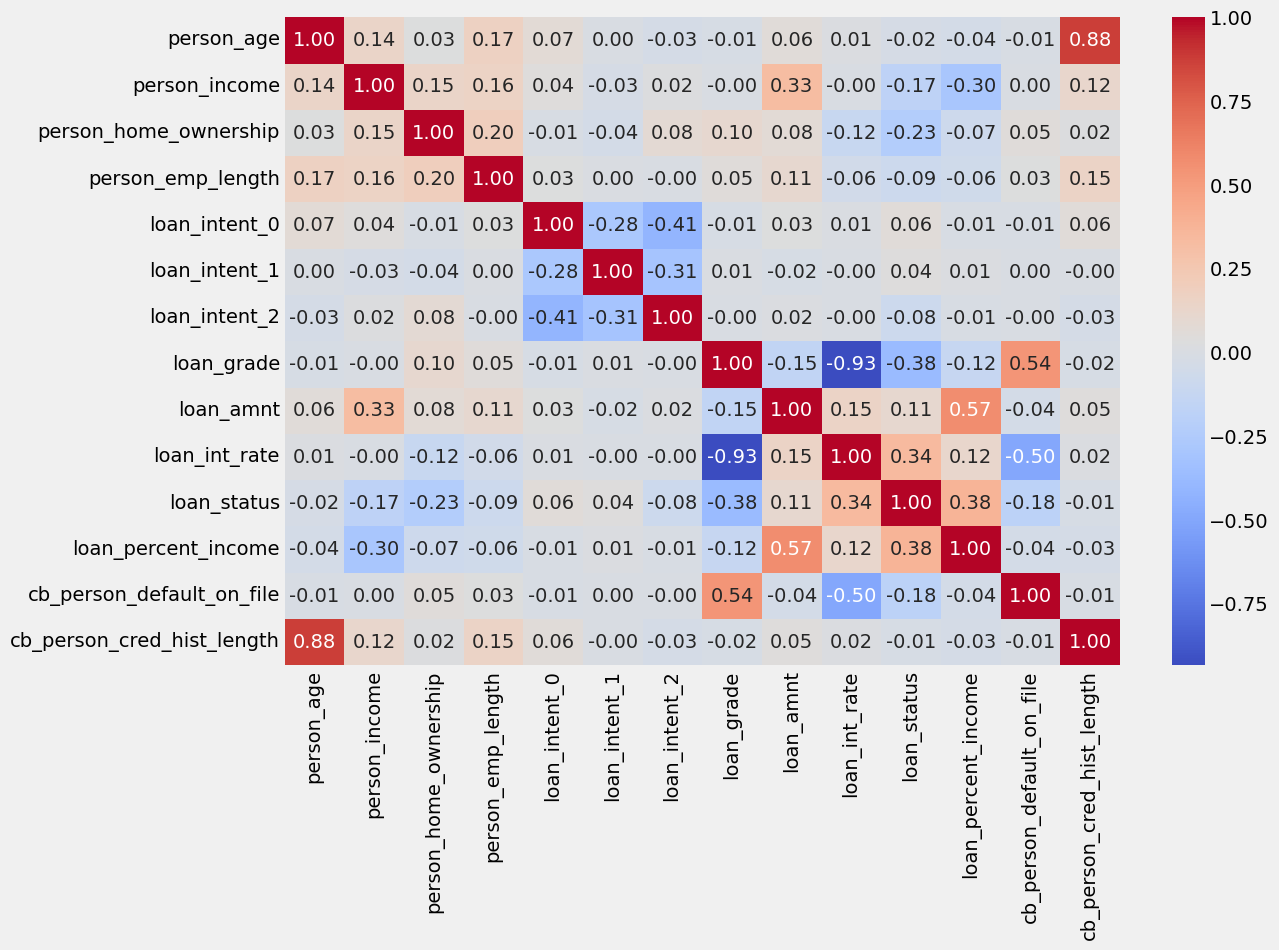

In [383]:
# Korelasyon matrisi
corr_matrix = df.corr()

# Isı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


**cb_person_cred_hist_length:** Kredi geçmişi uzunluğu, doğrudan kişinin kredi itibarını gösterir. Daha uzun bir kredi geçmişi genellikle daha iyi kredi puanına işaret eder ve kredi risk analizinde kritik bir faktör olarak kabul edilir.

**person_age**, dolaylı bir etkiye sahiptir. Yaş tek başına kredi riski açısından yeterli bilgi sunmayabilir; ancak kredi geçmişi uzunluğu bireyin ödeme geçmişi hakkında doğrudan bilgi sağlar.

In [384]:
df = df.drop(columns=['person_age'])


In [385]:
df2.head(10)

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
10,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4


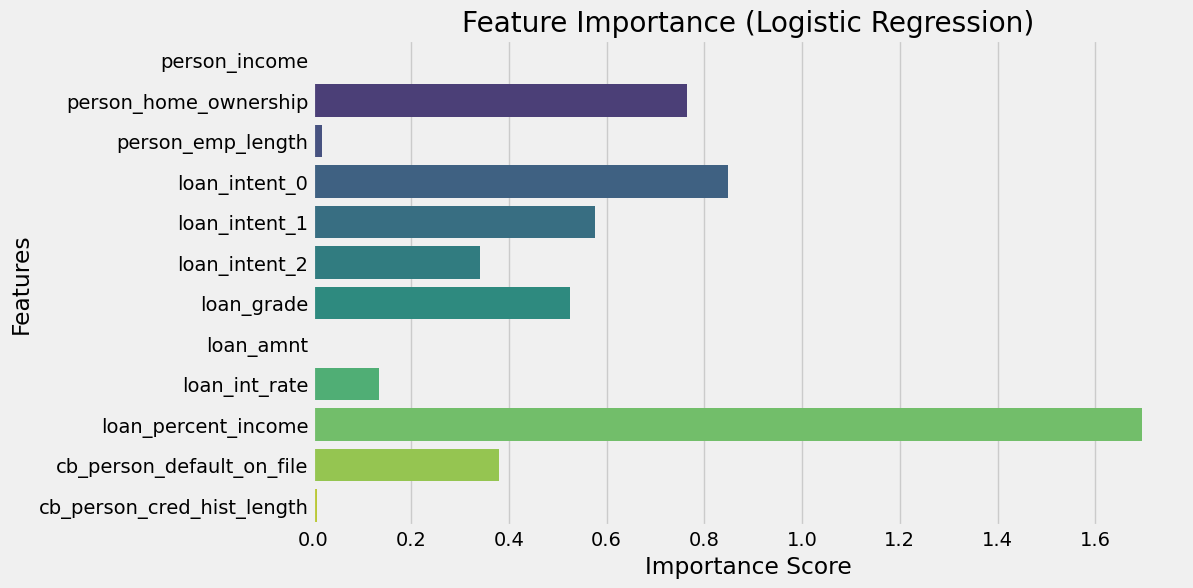

In [386]:
# Bağımsız ve bağımlı değişkenler
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Modeli tanımlama
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Modeli eğitme
logreg_model.fit(X, y)

# Özelliklerin katsayılarını alma
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(logreg_model.coef_[0])  # Katsayıların mutlak değerini alıyoruz
})

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [387]:
# Korelasyon matrisini hesaplama
correlation_matrix = df.corr()

# loan_status ile olan korelasyonu görmek için
loan_status_correlation = correlation_matrix['loan_status'].sort_values(ascending=False)

print(loan_status_correlation)


loan_status                   1.000000
loan_percent_income           0.379359
loan_int_rate                 0.335788
loan_amnt                     0.106885
loan_intent_0                 0.060206
loan_intent_1                 0.036874
cb_person_cred_hist_length   -0.014571
loan_intent_2                -0.082012
person_emp_length            -0.085013
person_income                -0.172207
cb_person_default_on_file    -0.180412
person_home_ownership        -0.232697
loan_grade                   -0.376282
Name: loan_status, dtype: float64


Bu çıktıyı yorumlarken, her bir özellik ile **loan_status** (kredi durumu) arasındaki ilişkiyi inceleyebiliriz. Korelasyon değeri, -1 ile +1 arasında değişir ve aşağıdaki şekilde yorumlanır:

- **1.0**: Mükemmel pozitif ilişki
- **-1.0**: Mükemmel negatif ilişki
- **0.0**: Hiçbir ilişki yok

### **loan_status ile diğer değişkenler arasındaki korelasyonlar:**

1. **loan_status: 1.000000**
   - **loan_status** ile kendi arasında mükemmel bir pozitif korelasyon vardır, çünkü bu değişken kendisini ifade eder.

2. **loan_percent_income: 0.379359**
   - **loan_percent_income** (kredi miktarının gelirle oranı) ile **loan_status** arasında orta düzeyde pozitif bir korelasyon vardır. Yani, gelirine oranla daha fazla kredi talep eden kişilerin temerrüte düşme olasılığı daha yüksek olabilir.

3. **loan_int_rate: 0.335788**
   - **loan_int_rate** (kredi faiz oranı) ile **loan_status** arasında da pozitif bir korelasyon vardır. Yüksek faiz oranlarına sahip kredilerin temerrüde düşme olasılığı daha yüksek olabilir.

4. **loan_amnt: 0.106885**
   - **loan_amnt** (kredi tutarı) ile **loan_status** arasında düşük düzeyde pozitif bir korelasyon vardır. Yani, kredi tutarı arttıkça temerrüte düşme olasılığı biraz daha artabilir, ancak bu ilişki çok güçlü değildir.

5. **loan_intent_0: 0.060206**, **loan_intent_1: 0.036874**, **loan_intent_2: -0.082012**
   - **loan_intent** kategorileri (kredi niyeti) ile **loan_status** arasında zayıf ilişkiler vardır. Kredi niyetinin temerrüt durumu üzerindeki etkisi çok belirgin değildir.

6. **cb_person_cred_hist_length: -0.014571**
   - **cb_person_cred_hist_length** (kredi geçmişi uzunluğu) ile **loan_status** arasında negatif bir ilişki vardır, ancak bu ilişki çok zayıftır. Kredi geçmişi uzun olan kişilerin temerrüte düşme olasılığı çok belirgin şekilde düşük değildir.

7. **person_emp_length: -0.085013**
   - **person_emp_length** (çalışma süresi) ile **loan_status** arasında negatif bir korelasyon vardır. Yani, daha uzun süre çalışan kişilerin temerrüte düşme olasılığı biraz daha düşük olabilir.

8. **person_income: -0.172207**
   - **person_income** (kişinin yıllık geliri) ile **loan_status** arasında negatif bir ilişki vardır. Yüksek geliri olan kişilerin temerrüte düşme olasılığı daha düşük olabilir.

9. **cb_person_default_on_file: -0.180412**
   - **cb_person_default_on_file** (kredi geçmişinde temerrüt olup olmadığı) ile **loan_status** arasında negatif bir ilişki vardır. Yani, kredi geçmişinde temerrüt bulunan kişilerin, kredi temerrüt durumunda olmama olasılığı daha yüksek olabilir.

10. **person_home_ownership: -0.232697**
    - **person_home_ownership** (ev sahipliği durumu) ile **loan_status** arasında orta düzeyde negatif bir korelasyon vardır. Ev sahipliği durumu, temerrüt durumuyla negatif bir ilişki gösteriyor, yani ev sahibi olan kişilerin temerrüde düşme olasılığı daha düşük olabilir.

11. **loan_grade: -0.376282**
    - **loan_grade** (kredi notu) ile **loan_status** arasında orta düzeyde negatif bir korelasyon vardır. Kredi notu arttıkça, temerrüde düşme olasılığı azalmaktadır. Bu, genellikle yüksek kredi notuna sahip kişilerin daha iyi ödeme geçmişine sahip olmaları ile ilgilidir.

---


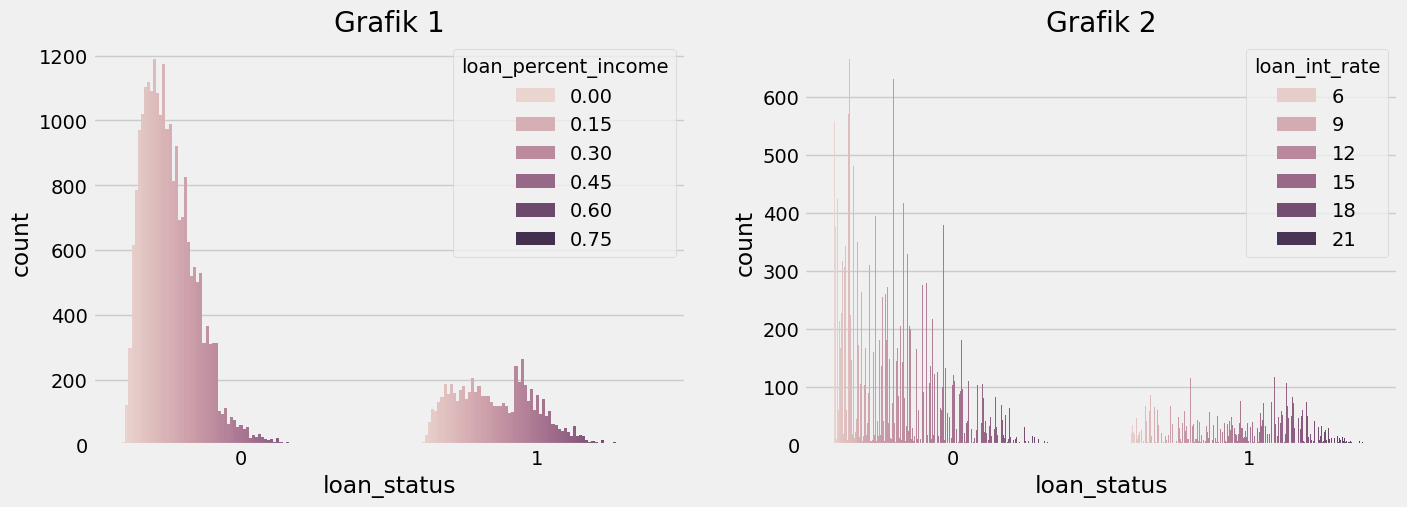

In [388]:
# loan_status ile aralarındaki ilişki güçlü olan sütunlar
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df2, x='loan_status', hue="loan_percent_income", ax=ax[0]).set_title("Grafik 1");
sns.countplot(data=df2, x='loan_status', hue='loan_int_rate', ax=ax[1]).set_title("Grafik 2");

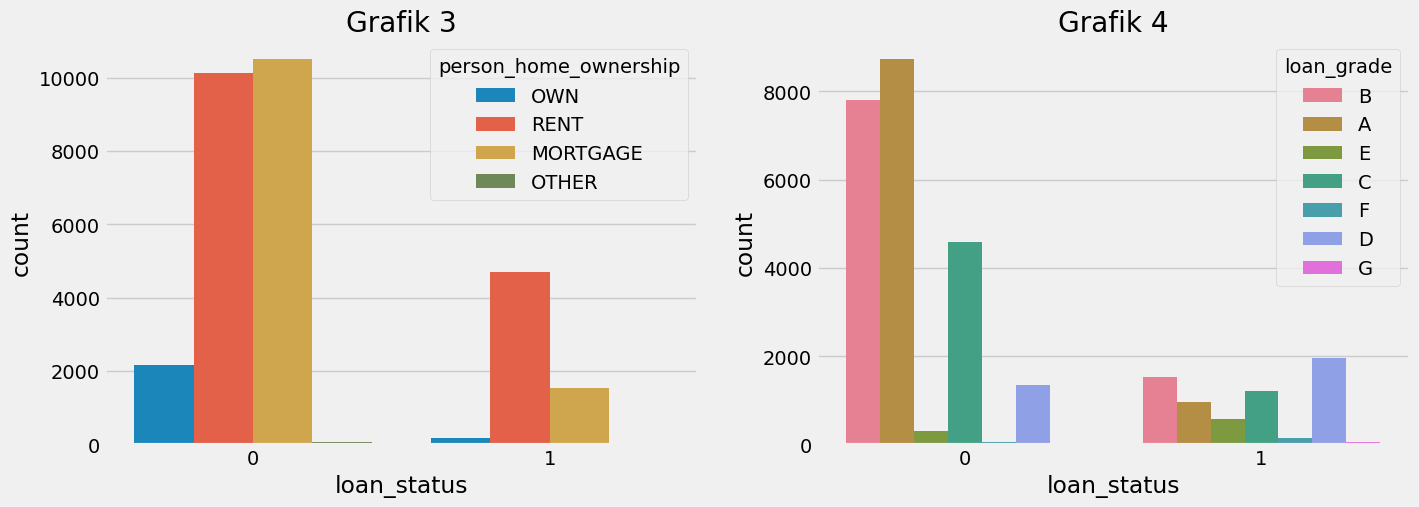

In [389]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df2, x='loan_status', hue='person_home_ownership', ax=ax[0]).set_title("Grafik 3");
sns.countplot(data=df2, x='loan_status', hue='loan_grade', ax=ax[1]).set_title("Grafik 4");

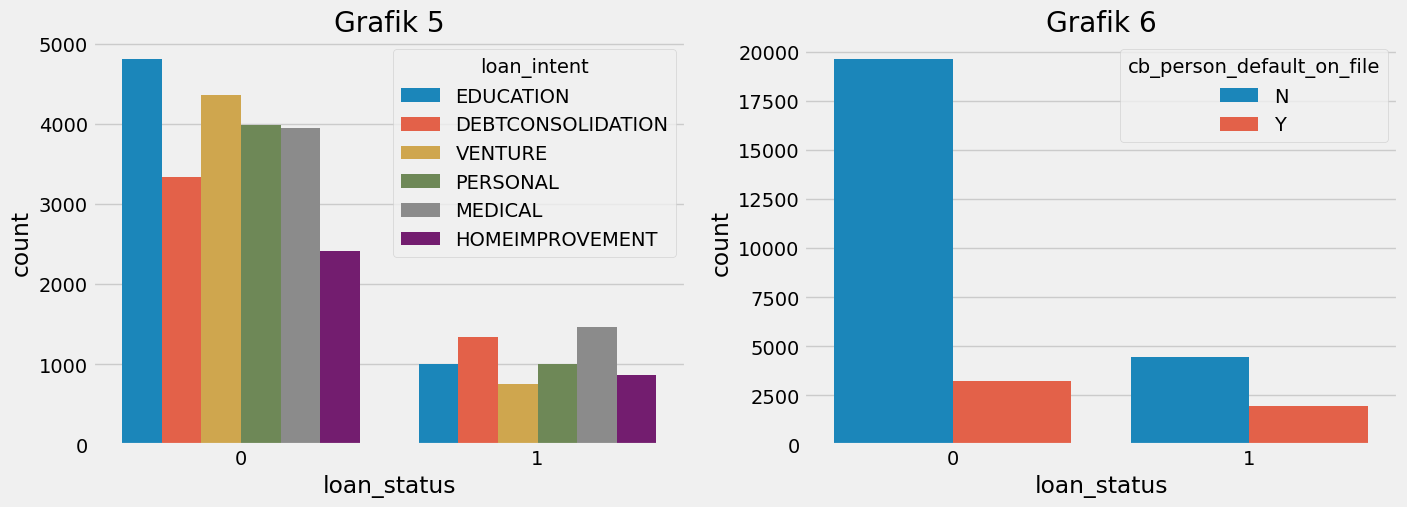

In [390]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df2, x='loan_status', hue='loan_intent', ax=ax[0]).set_title("Grafik 5");
sns.countplot(data=df2, x='loan_status', hue='cb_person_default_on_file', ax=ax[1]).set_title("Grafik 6");


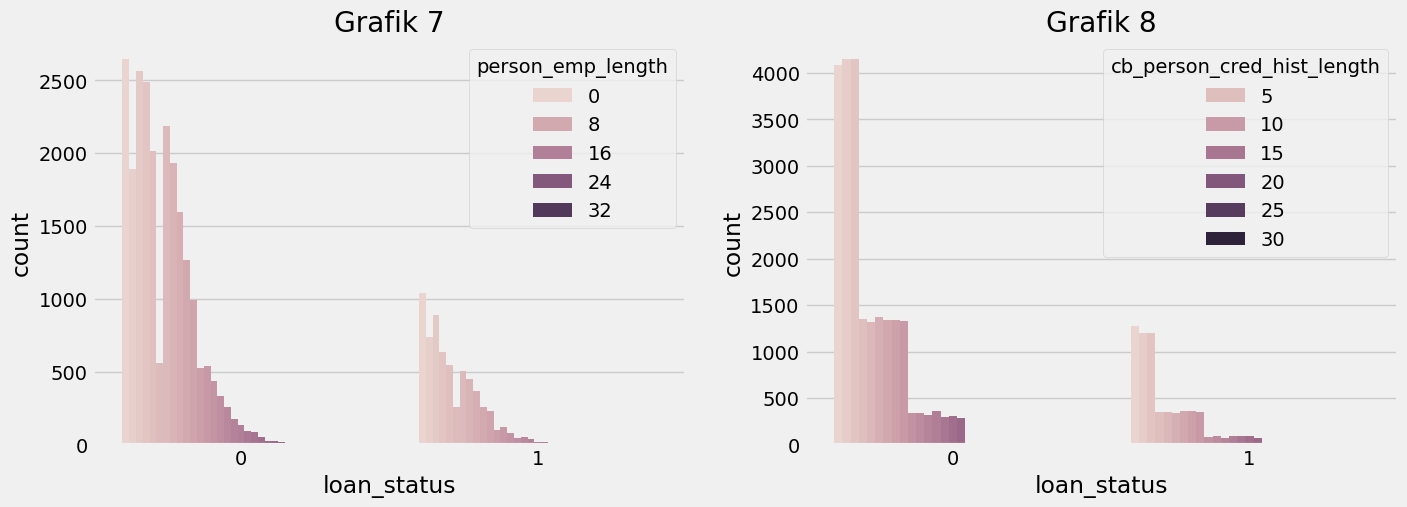

In [391]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df2, x='loan_status', hue='person_emp_length', ax=ax[0]).set_title("Grafik 7");
sns.countplot(data=df2, x='loan_status', hue='cb_person_cred_hist_length', ax=ax[1]).set_title("Grafik 8");


Text(0.5, 1.0, 'Boxplot 2')

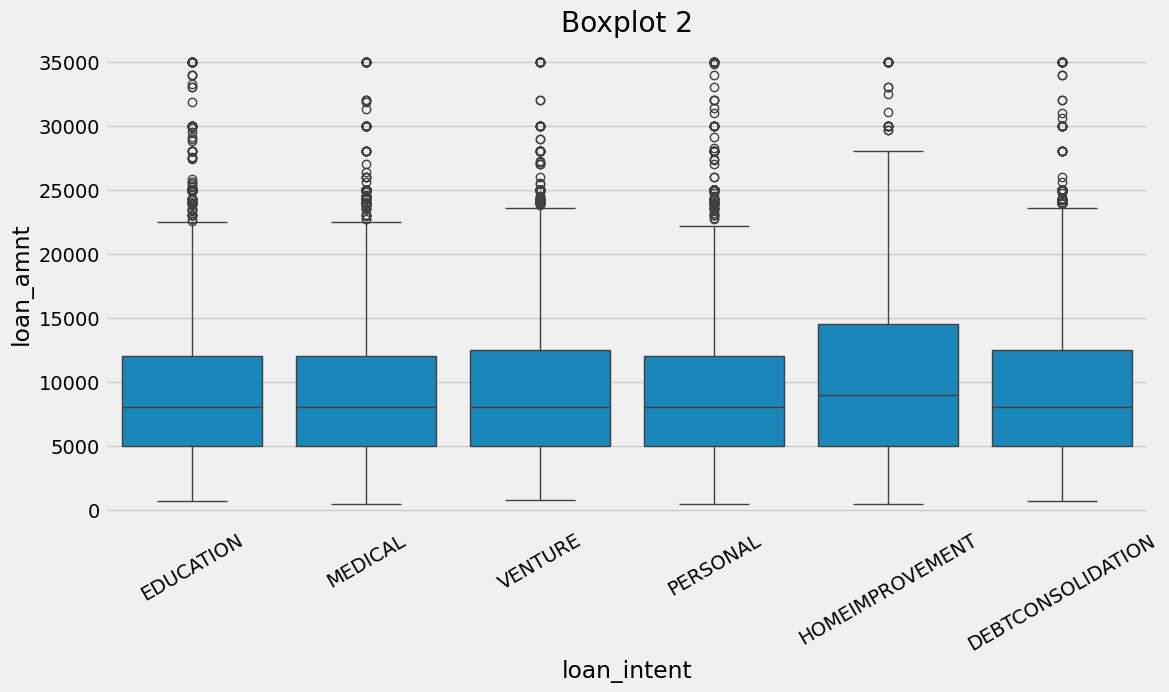

In [392]:
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_intent', y='loan_amnt', data=df2)
plt.xticks(rotation=30)
plt.title('Boxplot 2')

Text(0.5, 1.0, 'Boxplot 1')

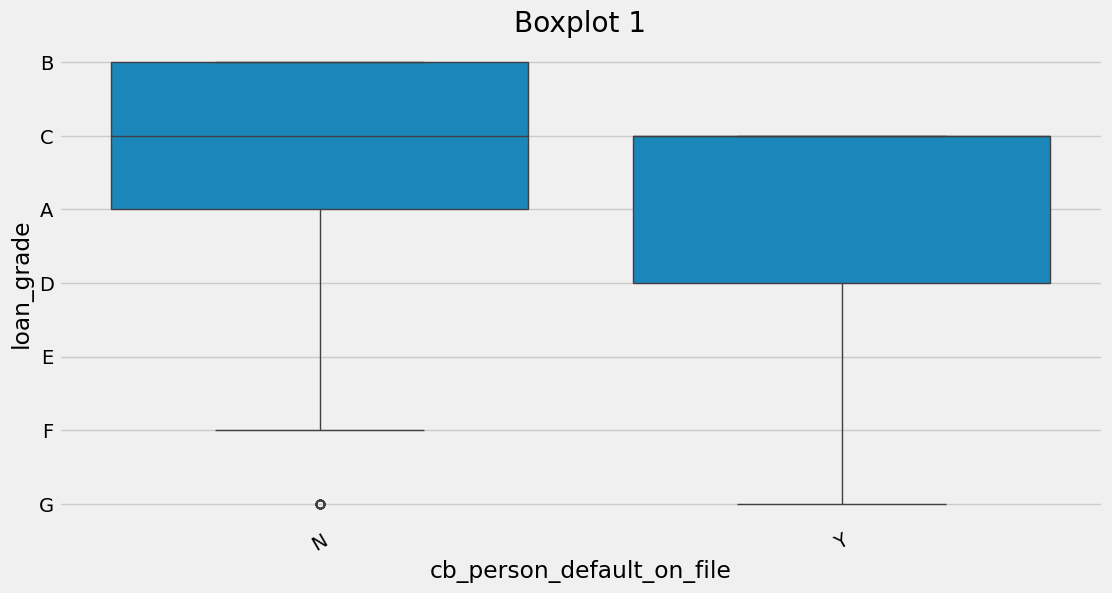

In [393]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cb_person_default_on_file', y='loan_grade', data=df2)
plt.xticks(rotation=30)
plt.title('Boxplot 1')

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

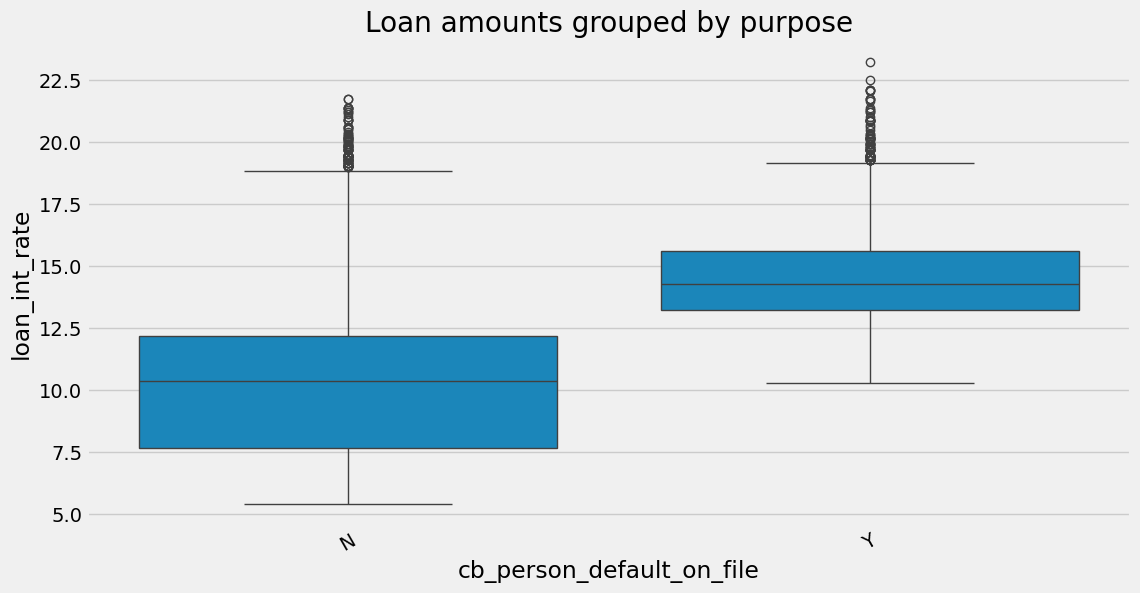

In [394]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cb_person_default_on_file', y='loan_int_rate', data=df2)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

# Modelleme
Logistic ve LightGBM modelleme

In [395]:
# 1. Veri bölme
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Eğitim (%80) ve test (%20) veri seti oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y,  # Sınıf dengesini korur
                                                    shuffle=True)

# 2. Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=0)
}

# 3. Cross-validation (StratifiedKFold kullanarak) ve doğruluk skoru hesaplama
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Sonuçları saklamak için boş bir dictionary oluşturuyoruz
model_results = {}

# 4. Modelleri eğitme ve değerlendirme
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Cross-validation ile doğruluk skoru hesaplama
    cv_scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)

        # Cross-validation doğruluk
        cv_scores.append(accuracy_score(y_val_cv, y_pred_cv))

    mean_cv_accuracy = np.mean(cv_scores)

    # Modeli test setiyle değerlendirme
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Test seti için doğruluk metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # ROC AUC score

    # Sonuçları saklama
    model_results[model_name] = {
        'CV Accuracy Mean': mean_cv_accuracy,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

# 5. Sonuçları yazdırma
print("\nModel Evaluation Results:")
for model_name, results in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")

    # Classification Report
    y_pred = models[model_name].predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))


Training and evaluating Logistic Regression...
Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 4126, number of negative: 14631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 18757, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219971 -> initscore=-1.265834
[LightGBM] [Info] Start training from score -1.265834
[LightGBM] [Info] Number of positive: 4126, number of negative: 14631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data

In [396]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23447, 12)
(23447,)
(5862, 12)
(5862,)


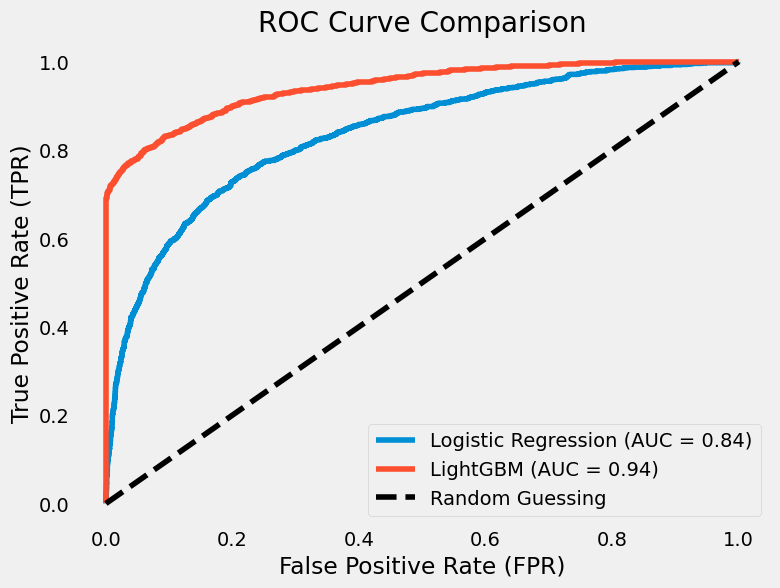

In [397]:
# ROC Eğrisi için grafik
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Test seti için pozitif sınıf olasılıklarını al
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC eğrisi için FPR, TPR ve eşik değerlerini hesapla
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # ROC eğrisini çiz
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Rastgele tahmin çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Grafiği düzenleme
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


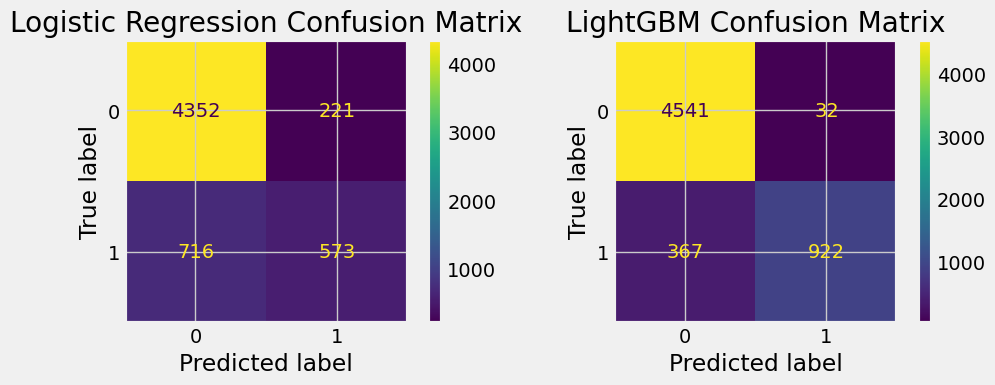

In [398]:
# Logistic Regression için Confusion Matrix
y_pred_logistic = models['Logistic Regression'].predict(X_test)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=models['Logistic Regression'].classes_)

# LightGBM için Confusion Matrix
y_pred_lgbm = models['LightGBM'].predict(X_test)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=models['LightGBM'].classes_)

# Logistic Regression Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
disp_logistic.plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.title("Logistic Regression Confusion Matrix")

# LightGBM Karışıklık Matrisi Görselleştirme
plt.subplot(1, 2, 2)
disp_lgbm.plot(cmap='viridis', values_format='d', ax=plt.gca())
plt.title("LightGBM Confusion Matrix")

plt.tight_layout()
plt.show()
